In [23]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

L = 2
K = len(np.unique(train_labels))
lr = 0.01
nb_epochs = 500
node_per_hidden_layer = 2
nb_batches = 100
W = []
losses_test = []

X_train = np.reshape(train_images, (train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
X_test = np.reshape(test_images, (test_images.shape[0], train_images.shape[1]*train_images.shape[2]))

Y_train = np.zeros((train_labels.shape[0], K))
Y_train[np.arange(Y_train.shape[0]), train_labels] = 1

Y_test = np.zeros((test_labels.shape[0], K))
Y_test[np.arange(Y_test.shape[0]), test_labels] = 1

X_train = np.array([[2,3],[4,5],[1,5],[0,1]])
Y_train = np.array([[0,1],[1,0],[0,1],[1,0]])

W.append(np.array([[0.1,0.3,0.4],[0.2,0.1,0.4]]).T)
for i in range(L-1):
    W.append(np.array([[0.1,0.3,0.4],[0.2,0.1,0.4]]).T)
W.append(np.array([[0.1,0.3,0.4],[0.2,0.1,0.4]]).T)


In [24]:

def softmax(z):
    exp = np.exp(z - z.max(1)[:,np.newaxis])
    return np.array(exp / exp.sum(1)[:,np.newaxis])


def softmax_derivative(z):
    sm = softmax(z)
    return sm * (1-sm)


def ReLU(z):
    return np.maximum(z, 0)


def ReLU_derivative(z):
    return (z >= 0).astype(int)


def get_loss(y, y_pred):
    return -np.sum(y * np.log(y_pred))

In [25]:
def fit():
    cc = 0
    minibatch_size = len(X_train) // nb_batches
    for epoch in range(nb_epochs):
        permutaion = list(np.random.permutation(X_train.shape[0]))
        X_shuffle = X_train[permutaion]
        Y_shuffle = Y_train[permutaion]
        print("Epoch----------------", epoch)
        for batche in range(0, 5):
            cc += 1
            Z = [None] * (L + 2)
            a = [None] * (L + 2)
            delta = [None] * (L + 2)
            X = X_train
            Y = Y_train

            #forward propagation
            a[0] = np.append(X, np.ones((len(X), 1)), axis=1)
            for i in range(L):
                Z[i + 1] = a[i] @ W[i]
                a[i + 1] = np.append(ReLU(Z[i+1]), np.ones((len(X), 1), dtype=int), axis=1)

            Z[-1] = a[L] @ W[L]
            a[-1] = softmax(Z[-1])

            #back propagation
            delta[-1] = (Y - a[-1]) * softmax_derivative(Z[-1])
            for i in range(L, 0, -1):
                delta[i] = (delta[i+1] @ W[i].T)[:,:-1] * ReLU_derivative(Z[i])

            for i in range(len(W)):
                g = a[i].T @ delta[i+1] / len(X)
                W[i] = W[i] + lr * g

        get_loss_on_test()   

In [26]:


def get_loss_on_test():
    Z_test = [None] * (L + 2)
    a_test = [None] * (L + 2)

    a_test[0] = np.append(X_train, np.ones((len(X_train), 1)), axis=1)
    for i in range(L):
        Z_test[i + 1] = a_test[i] @ W[i]
        a_test[i + 1] = np.append(ReLU(Z_test[i+1]), np.ones((len(X_train), 1)), axis=1)

    Z_test[-1] = a_test[L] @ W[L]
    a_test[-1] = softmax(Z_test[-1])

    losses_test.append(get_loss(Y_train, a_test[-1]))

In [27]:
def guess(index):
    Z_test = [None] * (L + 2)
    a_test = [None] * (L + 2)
    a_test[0] = np.append(X_test[index], 1)[np.newaxis, :]
    for i in range(L):
        Z_test[i + 1] = a_test[i] @ W[i]
        a_test[i + 1] = np.append(ReLU(Z_test[i+1]), 1)
        
    Z_test[-1] = a_test[L] @ W[L]
    a_test[-1] = softmax(Z_test[-1][np.newaxis, :])
    plt.imshow(test_images[index])
    plt.show()
    for j, k in enumerate(a_test[-1][0]):
        print(j, k)
    print("Correct: ", test_labels[index], "Choisi: ", np.argmax(a_test[-1]))

Epoch---------------- 0
Epoch---------------- 1
Epoch---------------- 2
Epoch---------------- 3
Epoch---------------- 4
Epoch---------------- 5
Epoch---------------- 6
Epoch---------------- 7
Epoch---------------- 8
Epoch---------------- 9
Epoch---------------- 10
Epoch---------------- 11
Epoch---------------- 12
Epoch---------------- 13
Epoch---------------- 14
Epoch---------------- 15
Epoch---------------- 16
Epoch---------------- 17
Epoch---------------- 18
Epoch---------------- 19
Epoch---------------- 20
Epoch---------------- 21
Epoch---------------- 22
Epoch---------------- 23
Epoch---------------- 24
Epoch---------------- 25
Epoch---------------- 26
Epoch---------------- 27
Epoch---------------- 28
Epoch---------------- 29
Epoch---------------- 30
Epoch---------------- 31
Epoch---------------- 32
Epoch---------------- 33
Epoch---------------- 34
Epoch---------------- 35
Epoch---------------- 36
Epoch---------------- 37
Epoch---------------- 38
Epoch---------------- 39
Epoch-----

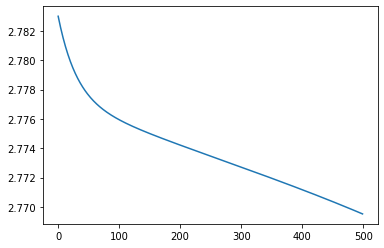

In [28]:
losses_test.clear()
fit()
plt.plot(losses_test)
plt.show()


In [29]:
guess(5)



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 785)